## Introduction

The project will display district location in city Poznań. For that task I will be looking the best location for Supermarket. 

## Data
<ul>
<li>District of Poznan https://en.wikipedia.org/wiki/Administrative_division_of_Pozna%C5%84</li>

<li>Geo data gather from the python function</li>

<li>FourSquare API.</li>
</ul>

## Method

Data gather form wiki and then fill up with location information. Thanks to this, I am able to display a map with districts. 
Foursquare api uses the limit of 5000 records in the area of 2500. It allows obtaining 2194 objects. 
The most popular 5 categories for a given district are used for the study.

## Result

The result shows that the best location for a supermarket can be chosen among districts within cluster 1.
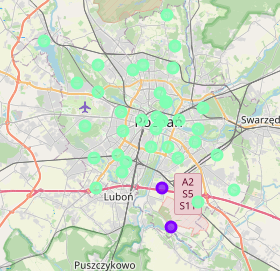

## Discussion / Conclusion

The use of the k means algorithm allows for quite precise analyzes as to the choice of location.
The result is a choice from among cluster 1.

In [1]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import geocoder
wiki_link = 'https://en.wikipedia.org/wiki/Administrative_division_of_Pozna%C5%84'
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/88.0.4324.182 Safari/537.36'}
wiki_page = requests.get(wiki_link, headers = headers)
wiki_page
soup = BeautifulSoup(wiki_page.content, 'html.parser')
table = soup.find('table', {'class':'wikitable sortable'}).tbody
rows = table.find_all('tr')
columns = ["District", "Population", "Area km2", "Population density km2"]
columns
df_1 = pd.DataFrame(columns = columns)
for i in range(1, len(rows)):
    tds = rows[i].find_all('td')
    if len(tds) == 7:
        values = [tds[0].text, tds[1].text, tds[2].text.replace('\n', ''.replace('\xa0','')), tds[3].text, tds[4].text.replace('\n', ''.replace('\xa0','')), tds[5].text.replace('\n', ''.replace('\xa0','')), tds[6].text.replace('\n', ''.replace('\xa0',''))]
    else:
        values = [td.text.replace('\n', '').replace('\xa0','') for td in tds]
        df_1 = df_1.append(pd.Series(values, index = columns), ignore_index = True)
        df_1
def get_latlng(arcgis_geocoder):
    
    lat_lng_coords = None
    
    while(lat_lng_coords is None):
        g = geocoder.arcgis('{}, Poznan, Poland'.format(arcgis_geocoder))
        lat_lng_coords = g.latlng
    return lat_lng_coords
districts = df_1['District']    
coordinates = [get_latlng(districts) for districts in districts.tolist()]
df_1_loc = df_1

df_1_coordinates = pd.DataFrame(coordinates, columns = ['Latitude', 'Longitude'])
df_1_loc['Latitude'] = df_1_coordinates['Latitude']
df_1_loc['Longitude'] = df_1_coordinates['Longitude']
df_1_loc.head(50)

,District,Population,Area km2,Population density km2,Latitude,Longitude
0,Antoninek-Zieliniec-Kobylepole,"9,881",20.54,481.06,52.380480,17.014070
1,Chartowo,"24,750",4.49,"5,512.25",52.391820,16.984170
2,Fabianowo-Kotowo,"1,736",7.1,244.51,52.352760,16.847000
3,Główna,"3,997",6.82,586.07,52.420350,16.994600
4,Głuszyna,"3,834",14.43,265.70,52.320070,16.950650
5,Górczyn,"13,230",4.33,"3,055.43",52.380990,16.877530
6,Grunwald Północ,"15,177",0.76,"19,969.74",53.485470,20.091440
7,Grunwald Południe,"25,808",3.83,"6,738.38",52.410330,16.911150
8,Jana III Sobieskiego i Marysieńki,"10,042",0.79,"12,711.40",52.175100,22.274460
9,Jeżyce,"24,172",1.98,"12,208.08",52.416930,16.882050


In [2]:
import numpy as np
import json 
from geopy.geocoders import Nominatim 
import requests 
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
import folium
from geopy.geocoders import Nominatim 
address = "Poznan, Polska"
geolocator = Nominatim(user_agent = "Poznan")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
map_poznan = folium.Map(location=[latitude, longitude], zoom_start=10)

for lat, lng, label in zip(df_1_loc["Latitude"], df_1_loc["Longitude"], df_1_loc["District"]):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=25,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.3,
        parse_html=False).add_to(map_poznan)  
    
map_poznan

In [9]:
CLIENT_ID = "FBTJOQ3GQILSTKXOXXT4ULTF02E3GBAU0OTMIOFWSJVF4BLP"
CLIENT_SECRET = "RHAOVSUBMXRWFZEQ5AMJ0D4NWZMQL3OSJNNJN1MSQBP5JWII"
VERSION = "20210227"

In [222]:
neighborhood_latitude = df_1_loc.loc[0, "Latitude"]
neighborhood_longitude = df_1_loc.loc[0, "Longitude"] 
neighborhood_name = df_1_loc.loc[0, "District"] 

LIMIT = 5000
radius = 2500

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '603ab10f3f9e6d7e0a836e42'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Poznań',
  'headerFullLocation': 'Poznań',
  'headerLocationGranularity': 'city',
  'totalResults': 33,
  'suggestedBounds': {'ne': {'lat': 52.40298002250006,
    'lng': 17.050861380389083},
   'sw': {'lat': 52.35797997750001, 'lng': 16.977278619611038}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4f8d4041e4b00c10ec068e61',
       'name': 'Centrum Wycieczkowe LECH',
       'location': {'lat': 52.384805136978756,
        'lng': 16.99709015654833,
        'labeledLatLngs': [{'label': 'display',
          'lat': 52.384805136978756,
          'lng': 16.99709015654833}],

In [223]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

venues = results['response']['groups'][0]['items']
nearby_venues = json_normalize(venues) # flatten JSON
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]
nearby_venues.head(250)

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:13: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead


,name,categories,lat,lng
0,Centrum Wycieczkowe LECH,Brewery,52.384805,16.997090
1,IKEA,Furniture / Home Store,52.382761,16.988068
2,Restauracja IKEA,Scandinavian Restaurant,52.382749,16.988050
3,Słoniarnia,Exhibit,52.399601,17.009501
4,Lidl,Supermarket,52.366861,16.993137
5,Cinema City Kinepolis,Multiplex,52.373559,16.980892
6,Fabryka Formy,Gym,52.373643,16.980948
7,Browar Lech,Brewery,52.385046,16.997498
8,Pizza Hut,Pizza Place,52.382246,16.993038
9,Auchan,Supermarket,52.383023,16.995076


In [224]:
def getNearbyVenues(names, latitudes, longitudes, radius=2500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['District', 
                  'Latitude', 
                  'Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [225]:
 poznan_venues = getNearbyVenues(names=df_1_loc['District'],
                                   latitudes=df_1_loc['Latitude'],
                                   longitudes=df_1_loc['Longitude']
                                  )

Antoninek-Zieliniec-Kobylepole
Chartowo
Fabianowo-Kotowo
Główna
Głuszyna
Górczyn
Grunwald Północ
Grunwald Południe
Jana III Sobieskiego i Marysieńki
Jeżyce
Junikowo
Kiekrz
Krzesiny-Pokrzywno-Garaszewo
Krzyżowniki-Smochowice
Osiedle Kwiatowe
Ławica
Morasko-Radojewo
Naramowice
Nowe Winogrady Południe
Nowe Winogrady Północ
Nowe Winogrady Wschód
Ogrody
Ostrów Tumski-Śródka-Zawady-Komandoria
Piątkowo
Podolany
Rataje
Sołacz
Stare Miasto
Stare Winogrady
Starołęka-Minikowo-Marlewo
Stary Grunwald
Strzeszyn
Szczepankowo-Spławie-Krzesinki
Świerczewo
Św. Łazarz
Umultowo
Warszawskie-Pomet-Maltańskie
Wilda
Winiary
Wola
Żegrze
Zielony Dębiec


In [226]:
poznan_venues.head(8000)

,District,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Antoninek-Zieliniec-Kobylepole,52.38048,17.01407,Centrum Wycieczkowe LECH,52.384805,16.997090,Brewery
1,Antoninek-Zieliniec-Kobylepole,52.38048,17.01407,IKEA,52.382761,16.988068,Furniture / Home Store
2,Antoninek-Zieliniec-Kobylepole,52.38048,17.01407,Restauracja IKEA,52.382749,16.988050,Scandinavian Restaurant
3,Antoninek-Zieliniec-Kobylepole,52.38048,17.01407,Słoniarnia,52.399601,17.009501,Exhibit
4,Antoninek-Zieliniec-Kobylepole,52.38048,17.01407,Lidl,52.366861,16.993137,Supermarket
...,...,...,...,...,...,...,...
2190,Zielony Dębiec,52.37469,16.88916,Fresh Market,52.389802,16.875413,Convenience Store
2191,Zielony Dębiec,52.37469,16.88916,Shell,52.358737,16.905448,Gas Station
2192,Zielony Dębiec,52.37469,16.88916,Rynek Łazarski,52.394795,16.901816,Farmers Market
2193,Zielony Dębiec,52.37469,16.88916,Shell,52.386295,16.912081,Gas Station


In [228]:
poznan_onehot = pd.get_dummies(poznan_venues[['Venue Category']], prefix="", prefix_sep="")
poznan_onehot

,Airport,Airport Lounge,Airport Terminal,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Automotive Shop,BBQ Joint,Bagel Shop,...,Tram Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Water Park,Whisky Bar,Wine Bar,Zoo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2190,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2191,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2192,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2193,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [229]:
poznan_onehot

,Airport,Airport Lounge,Airport Terminal,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Automotive Shop,BBQ Joint,Bagel Shop,...,Tram Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Water Park,Whisky Bar,Wine Bar,Zoo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2190,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2191,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2192,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2193,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [230]:
poznan_onehot['Neighborhood'] = poznan_venues['District'] 
poznan_grouped = poznan_onehot.groupby('Neighborhood').mean().reset_index()
poznan_grouped

,Neighborhood,Airport,Airport Lounge,Airport Terminal,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Automotive Shop,BBQ Joint,...,Tram Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Water Park,Whisky Bar,Wine Bar,Zoo
0,Antoninek-Zieliniec-Kobylepole,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.000000,0.000000,...,0.090909,0.000000,0.000000,0.030303,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
1,Chartowo,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.000000,0.000000,...,0.097561,0.012195,0.000000,0.012195,0.00,0.000000,0.012195,0.000000,0.000000,0.012195
2,Fabianowo-Kotowo,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.033333,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
3,Grunwald Południe,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.000000,0.000000,...,0.000000,0.010000,0.010000,0.000000,0.00,0.000000,0.000000,0.000000,0.020000,0.010000
4,Grunwald Północ,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
5,Górczyn,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.013514,0.000000,0.000000,...,0.081081,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.013514,0.000000,0.000000
6,Głuszyna,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
7,Główna,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.052632,0.000000,...,0.105263,0.000000,0.000000,0.000000,0.00,0.000000,0.052632,0.000000,0.000000,0.052632
8,Jana III Sobieskiego i Marysieńki,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
9,Jeżyce,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.000000,0.000000,...,0.014286,0.014286,0.014286,0.000000,0.00,0.000000,0.000000,0.014286,0.028571,0.014286


In [231]:
num_top_venues = 5

for hood in poznan_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = poznan_grouped[poznan_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Antoninek-Zieliniec-Kobylepole----
                    venue  freq
0            Tram Station  0.09
1  Furniture / Home Store  0.09
2                 Brewery  0.09
3    Fast Food Restaurant  0.06
4             Supermarket  0.06


----Chartowo----
                  venue  freq
0          Tram Station  0.10
1  Fast Food Restaurant  0.09
2           Supermarket  0.06
3           Coffee Shop  0.05
4                 Hotel  0.05


----Fabianowo-Kotowo----
                    venue  freq
0             Supermarket  0.10
1                   Hotel  0.10
2                   Plaza  0.07
3  Furniture / Home Store  0.07
4      Italian Restaurant  0.07


----Grunwald Południe----
                venue  freq
0                Café  0.12
1  Italian Restaurant  0.07
2                Park  0.06
3          Restaurant  0.04
4              Bakery  0.04


----Grunwald Północ----
               venue  freq
0     History Museum  0.50
1               Park  0.25
2      Historic Site  0.25
3  Polish Restaurant 

In [232]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [233]:
num_top_venues = 5
indicators = ['st', 'nd', 'rd']

columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))
        
poznan_venues_sorted = pd.DataFrame(columns=columns)
poznan_venues_sorted['Neighborhood'] = poznan_grouped['Neighborhood']

for ind in np.arange(poznan_grouped.shape[0]):
    poznan_venues_sorted.iloc[ind, 1:] = return_most_common_venues(poznan_grouped.iloc[ind, :], num_top_venues)

poznan_venues_sorted.head(27)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Antoninek-Zieliniec-Kobylepole,Tram Station,Brewery,Furniture / Home Store,Supermarket,Fast Food Restaurant
1,Chartowo,Tram Station,Fast Food Restaurant,Supermarket,Coffee Shop,Hotel
2,Fabianowo-Kotowo,Hotel,Supermarket,Plaza,Italian Restaurant,Fast Food Restaurant
3,Grunwald Południe,Café,Italian Restaurant,Park,Restaurant,Bakery
4,Grunwald Północ,History Museum,Park,Historic Site,Falafel Restaurant,French Restaurant
5,Górczyn,Supermarket,Hotel,Tram Station,Gas Station,Italian Restaurant
6,Głuszyna,Garden Center,Food & Drink Shop,Zoo,Farmers Market,French Restaurant
7,Główna,Bus Stop,Restaurant,Hotel,Tram Station,Zoo
8,Jana III Sobieskiego i Marysieńki,Hotel,Park,Indian Restaurant,Café,Gym Pool
9,Jeżyce,Café,Italian Restaurant,Park,Bakery,Restaurant


In [234]:
from sklearn.cluster import KMeans

In [235]:
poznan_merged = df_1
poznan_merged['Cluster Labels'] = kmeans.labels_

poznan_merged = poznan_merged.join(poznan_venues_sorted.set_index('Neighborhood'), on='District')
poznan_venues_sorted.head(42)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Antoninek-Zieliniec-Kobylepole,Tram Station,Brewery,Furniture / Home Store,Supermarket,Fast Food Restaurant
1,Chartowo,Tram Station,Fast Food Restaurant,Supermarket,Coffee Shop,Hotel
2,Fabianowo-Kotowo,Hotel,Supermarket,Plaza,Italian Restaurant,Fast Food Restaurant
3,Grunwald Południe,Café,Italian Restaurant,Park,Restaurant,Bakery
4,Grunwald Północ,History Museum,Park,Historic Site,Falafel Restaurant,French Restaurant
5,Górczyn,Supermarket,Hotel,Tram Station,Gas Station,Italian Restaurant
6,Głuszyna,Garden Center,Food & Drink Shop,Zoo,Farmers Market,French Restaurant
7,Główna,Bus Stop,Restaurant,Hotel,Tram Station,Zoo
8,Jana III Sobieskiego i Marysieńki,Hotel,Park,Indian Restaurant,Café,Gym Pool
9,Jeżyce,Café,Italian Restaurant,Park,Bakery,Restaurant


In [236]:
ks = 3

poznan_grouped_clustering = poznan_grouped.drop('Neighborhood', 1)

kmeans = KMeans(n_clusters=ks, random_state=0).fit(poznan_grouped_clustering)

kmeans.labels_[1:200]

array([1, 1, 1, 0, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int32)

In [242]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

markers_colors = []
for lat, lon, poi, cluster in zip(poznan_merged['Latitude'], poznan_merged['Longitude'], poznan_merged['District'], poznan_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster],
        fill=True,
        fill_color=rainbow[cluster],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [238]:
poznan_merged.loc[poznan_merged['Cluster Labels'] == 0, poznan_merged.columns[[0] + list(range(4, poznan_merged.shape[1]))]]

,District,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
4,Głuszyna,52.32007,16.95065,0,Garden Center,Food & Drink Shop,Zoo,Farmers Market,French Restaurant
29,Starołęka-Minikowo-Marlewo,52.35271,16.93844,0,Supermarket,Hotel,Park,Gas Station,Tram Station


In [239]:
poznan_merged.loc[poznan_merged['Cluster Labels'] == 1, poznan_merged.columns[[0] + list(range(4, poznan_merged.shape[1]))]]

,District,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Antoninek-Zieliniec-Kobylepole,52.380480,17.014070,1,Tram Station,Brewery,Furniture / Home Store,Supermarket,Fast Food Restaurant
1,Chartowo,52.391820,16.984170,1,Tram Station,Fast Food Restaurant,Supermarket,Coffee Shop,Hotel
2,Fabianowo-Kotowo,52.352760,16.847000,1,Hotel,Supermarket,Plaza,Italian Restaurant,Fast Food Restaurant
3,Główna,52.420350,16.994600,1,Bus Stop,Restaurant,Hotel,Tram Station,Zoo
5,Górczyn,52.380990,16.877530,1,Supermarket,Hotel,Tram Station,Gas Station,Italian Restaurant
7,Grunwald Południe,52.410330,16.911150,1,Café,Italian Restaurant,Park,Restaurant,Bakery
8,Jana III Sobieskiego i Marysieńki,52.175100,22.274460,1,Hotel,Park,Indian Restaurant,Café,Gym Pool
9,Jeżyce,52.416930,16.882050,1,Café,Italian Restaurant,Park,Bakery,Restaurant
10,Junikowo,52.378340,16.845200,1,Supermarket,Hotel,Gym,Soccer Stadium,Pizza Place
11,Kiekrz,52.475990,16.775590,1,Supermarket,Hotel,Sushi Restaurant,Train Station,Falafel Restaurant


In [240]:
poznan_merged.loc[poznan_merged['Cluster Labels'] == 2, poznan_merged.columns[[0] + list(range(4, poznan_merged.shape[1]))]]

,District,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
6,Grunwald Północ,53.48547,20.09144,2,History Museum,Park,Historic Site,Falafel Restaurant,French Restaurant


In [241]:
poznan_merged.loc[poznan_merged['Cluster Labels'] == 3, poznan_merged.columns[[0] + list(range(4, poznan_merged.shape[1]))]]

,District,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
